In [1]:
import os
import sys
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from data_handle import(
    ForexDataClean,
    ForexDataLoad
)

from features import ForexFeauturesExtractor

from models import ForexAutoencoder
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

data = ForexDataLoad(file_path = '../data/usdjpy.csv').data

cleaner = ForexDataClean(data = data)
data = cleaner.fast_cleaner()

features = ForexFeauturesExtractor(
    data = data,
    momentum_parameters = {
        'rsi_periods' : [4, 6, 8, 10, 12, 14]*10,
        'stoch_fk_sk_sd_periods' : [[4, 1, 1], [6, 1, 1], [8, 2, 2], [10, 2, 2], [12, 3, 3], [14, 3, 3]]*10,
        'williams_periods' :  [4, 6, 8, 10, 12, 14]*10,
        'cci_periods' :  [4, 6, 8, 10, 12, 14]*10,
        'momentum_periods' : [4, 6, 8, 10, 12, 14]*10
    },
)

indicators_data, signals_data, extreme_data = features.extract_all_features()

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_from_database
Data loaded successfully!
Shape: (41476, 5)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers 
5 fast_cleaner
Keep = first and subset = None
Removed 0 duplicate entries
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent
No missing values found
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent


In [10]:
label = extreme_data['Label_p10_o10']

In [11]:
data = pd.concat(
    [label, signals_data['reversal']],
    axis = 1
)

In [12]:
data.tail()

,Label_p10_o10,close,rsi_4_swing_fail,rsi_6_swing_fail,rsi_8_swing_fail,rsi_10_swing_fail,rsi_12_swing_fail,rsi_14_swing_fail,rsi_4_reversal,rsi_6_reversal,...,cci_6_reversal,cci_8_reversal,cci_10_reversal,cci_12_reversal,cci_14_reversal,sar_0.02_0.2_reversal,keltner_ema_20_atr_10_2.0_upper_keltner_ema_20_atr_10_2.0_lower_keltner_ema_20_atr_10_2.0_middle_reversal,std_dev_20_mean_reversion,std_dev_50_mean_reversion,std_dev_100_mean_reversion
datetime,,,,,,,,,,,,,,,,,,,,,
2024-09-02 14:00:00,2,146.985,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
2024-09-02 15:00:00,0,146.979,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,2
2024-09-02 16:00:00,0,146.961,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,2
2024-09-02 17:00:00,0,146.959,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
2024-09-02 18:00:00,0,146.923,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [13]:
autoencoder_signals = ForexAutoencoder(
        data = data,
        input_dim = data.shape[1] - 1,  
        target_col = 'Label_p10_o10',
        encoding_dim = 3,  
        prefered_name = 'divergence',  
        epochs = 50,
        batch_size = 24,
        prints = True
    )

Building model...


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16)             │            6

 Total params: 32,772 (128.02 KB)

 Trainable params: 31,780 (124.14 KB)

 Non-trainable params: 992 (3.88 KB)

Preparing data...
Training samples: 33020
Test samples: 8256
Feature shape: (41276, 33)
Training model...
Epoch 1/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3549 - mae: 0.7483 - mse: 1.3549 - val_loss: 0.7102 - val_mae: 0.4438 - val_mse: 0.7102 - learning_rate: 0.0010
Epoch 2/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7949 - mae: 0.4919 - mse: 0.7949 - val_loss: 0.6586 - val_mae: 0.4264 - val_mse: 0.6586 - learning_rate: 0.0010
Epoch 3/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7412 - mae: 0.4594 - mse: 0.7412 - val_loss: 0.6098 - val_mae: 0.4058 - val_mse: 0.6098 - learning_rate: 0.0010
Epoch 4/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7157 - mae: 0.4426 - mse: 0.7157 - val_loss: 0.5760 - val_mae: 0.3855 - val_mse: 0.5760 - learning_rate: 0.0010
Epoch 5/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6977 - mae: 0.4304 - mse: 0.6977 - val_loss: 0.5700 - val_mae: 0.3753 - val_mse: 0.5700 - learning_rate: 0.0010
Epoch 6/50
137

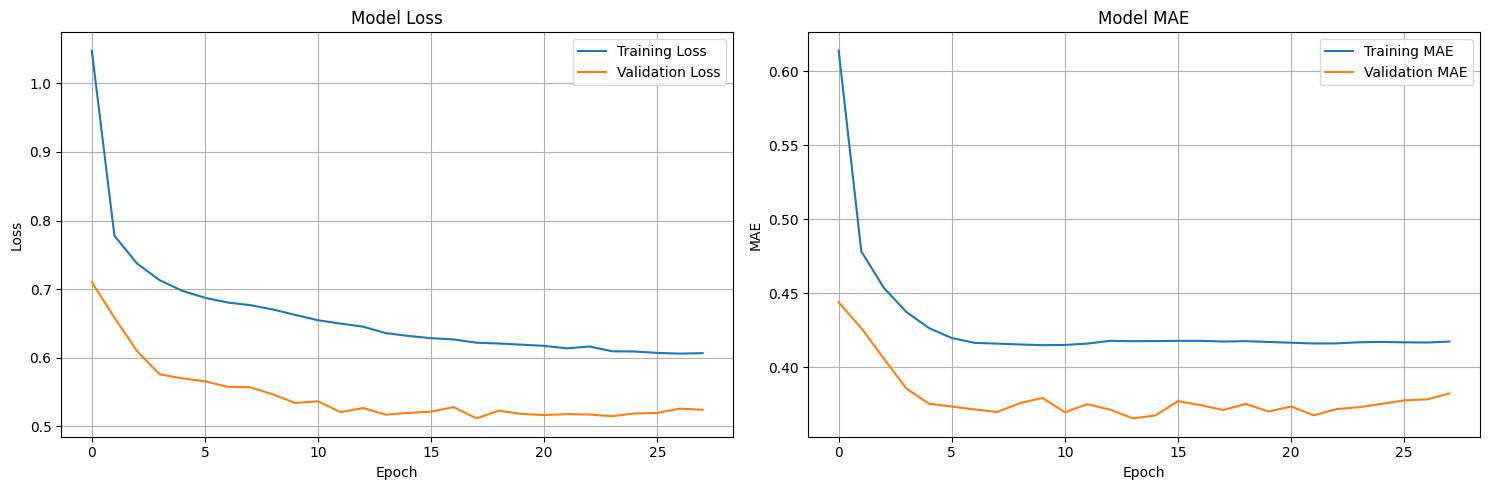

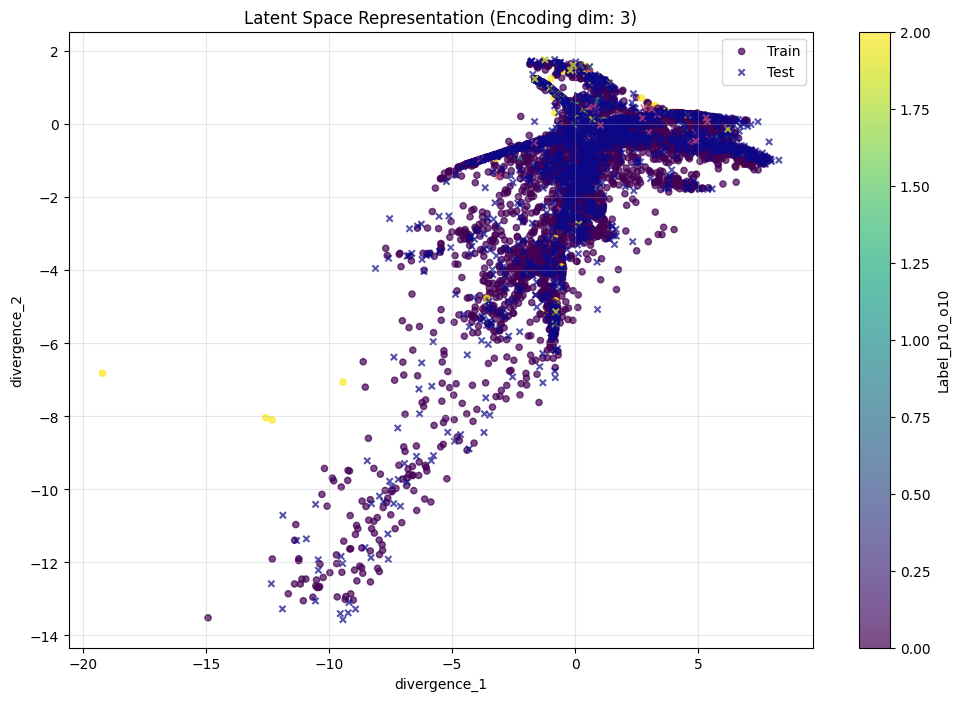

In [14]:
results = autoencoder_signals.run_full_pipeline(plots = True)

In [16]:
final_data =results['data_with_latent']